In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

## Deep Learning functions

In [2]:
def initialization(n0, n1, n2):
    
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2,
    }
    
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1' : A1,
        'A2' : A2
    }
    
    return activations

def back_propagation(X, y, parameters, activations):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameters['W2']
    
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) # keepdims est important pour le broadcasting
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2,
    }
    
    return gradients

def update(parameters, gradients, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2,
    }
    
    return parameters

def predict(X, parameters, boolean_output=True):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    if boolean_output:
        return A2 >= 0.5
    else:
        return A2

## Neural Network

In [3]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialization
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parameters = initialization(n0, n1, n2)

    train_loss = []
    train_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
         
        activations = forward_propagation(X, parameters)
        gradients = back_propagation(X, y, parameters, activations)
        parameters = update(parameters, gradients, learning_rate)
        
        if i%10 == 0:
            y_normalized = activations['A2']
            y_normalized = y_normalized/y_normalized.sum()
            train_loss.append(log_loss(y, y_normalized))
            y_pred = predict(X, parameters)
            y_pred = y_pred
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    return parameters, train_loss, train_acc

## Prepare data

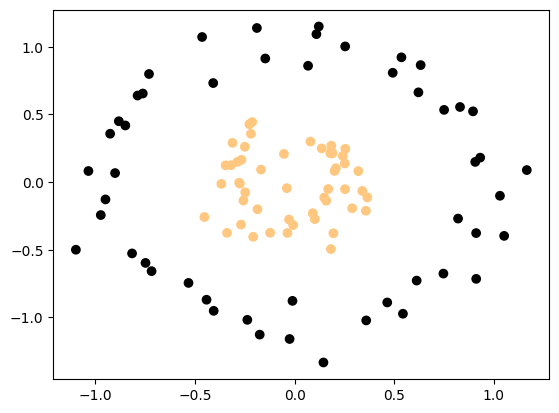

In [4]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape(1,y.shape[0])

plt.scatter(X[0, :], X[1, :], c=y, cmap='copper')
plt.show()

## Train model

In [5]:
parameters, train_loss, train_acc = neural_network(X, y, n1=8, n_iter=10000, learning_rate=0.1)

100%|██████████| 10000/10000 [00:01<00:00, 5930.57it/s]


## Model plots

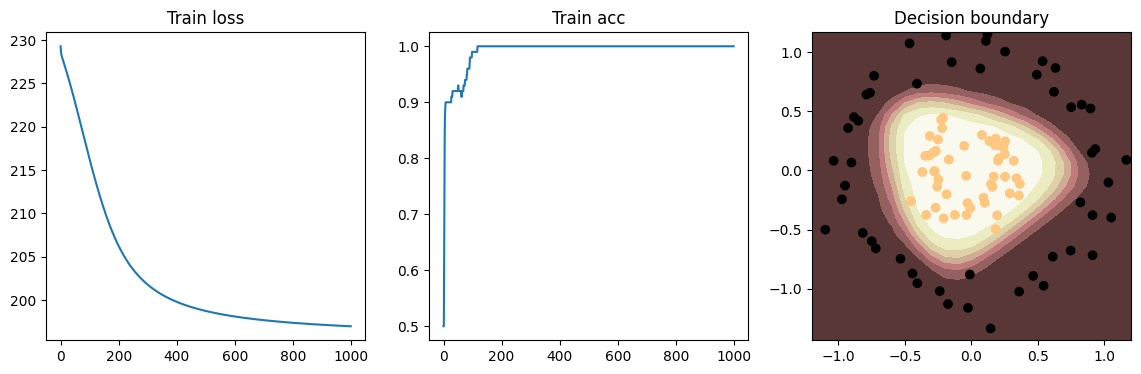

In [7]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.title('Train loss')
plt.plot(train_loss)

plt.subplot(1, 3, 2)
plt.title('Train acc')
plt.plot(train_acc)

plt.subplot(1, 3, 3)
x1lim = np.add([X[0,:].min(), X[0,:].max()], np.array([-1, 1])/10)
x2lim = np.add([X[1,:].min(), X[1,:].max()], np.array([-1, 1])/10)
x1 = np.arange(x1lim[0], x1lim[1], 0.1)
x2 = np.arange(x2lim[0], x2lim[1], 0.1)

x1_grid, x2_grid = np.meshgrid(x1, x2)
x_grid_flatten = np.vstack((x1_grid.reshape(1, -1), x2_grid.reshape(1, -1)))

y_flatten = predict(x_grid_flatten, parameters, boolean_output=False)
y_grid = y_flatten.reshape(x1_grid.shape)

plt.contourf(x1_grid, x2_grid, y_grid, cmap='pink')
plt.scatter(X[0, :], X[1, :], c=y, cmap='copper')
plt.title('Decision boundary')
plt.show()